In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
plt.rcParams['figure.figsize'] = [10, 10]

(<AxesSubplot:title={'center':'Choice D error'}>,
 Text(0.5, 1.0, 'Choice D error'))

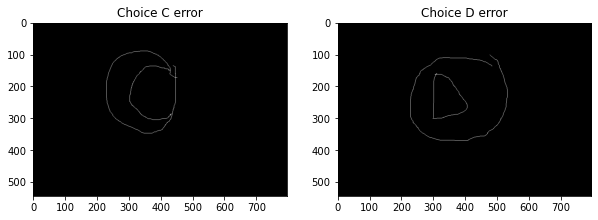

In [25]:
d_img = cv2.imread('d.png', cv2.IMREAD_GRAYSCALE)
c_img = cv2.imread('c.png', cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1), plt.imshow(c_img, cmap='gray'), plt.title("Choice C error")
plt.subplot(1, 2, 2), plt.imshow(d_img, cmap='gray'), plt.title("Choice D error")

Khi tôi xem xét các lỗi gặp trong quá trình làm
<ul>
    <li>Khi vòng khoanh bị dính vào chữ C thì khi fill hole diện tích phần fill bị nhỏ đi => cần làm cho phần fill to lên</li>
    <li>Khi khoanh vòng tròn vào chữ D và vòng khoanh ko khép kín, nó chỉ fill phần chữ D mà không fill vòng tròn khoanh</li>
</ul>
Cần xử lý các lỗi trên, phía dưới là hướng mà tôi đã làm thử

(<AxesSubplot:title={'center':'Choice D error'}>,
 Text(0.5, 1.0, 'Choice D error'))

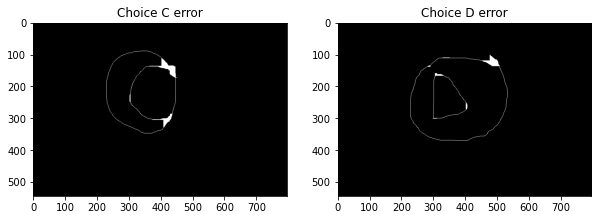

In [26]:
ret,thresh1 = cv2.threshold(c_img,20,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(d_img,20,255,cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))
c_closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
d_closing = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, kernel)
plt.subplot(1, 2, 1), plt.imshow(c_closing, cmap='gray'), plt.title("Choice C error")
plt.subplot(1, 2, 2), plt.imshow(d_closing, cmap='gray'), plt.title("Choice D error")

(<AxesSubplot:title={'center':'Choice D error'}>,
 Text(0.5, 1.0, 'Choice D error'))

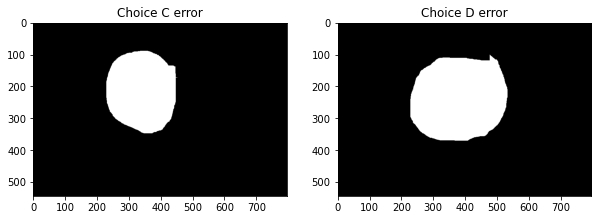

In [27]:
# lấp chỗ trống trong những hình tròn
from scipy.ndimage.morphology import binary_fill_holes

# binary_fill_holes là 1 hàm binary delation
c_clean_image = binary_fill_holes(c_closing)
d_clean_image = binary_fill_holes(d_closing)
c_clean_image = np.float32(c_clean_image)
d_clean_image = np.float32(d_clean_image)
plt.subplot(1, 2, 1), plt.imshow(c_clean_image, cmap='gray'), plt.title("Choice C error")
plt.subplot(1, 2, 2), plt.imshow(d_clean_image, cmap='gray'), plt.title("Choice D error")

(<AxesSubplot:title={'center':'Choice D error'}>,
 Text(0.5, 1.0, 'Choice D error'))

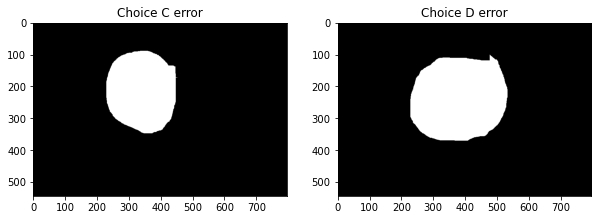

In [30]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
c_opening = cv2.morphologyEx(c_clean_image, cv2.MORPH_OPEN, kernel)
d_opening = cv2.morphologyEx(d_clean_image, cv2.MORPH_OPEN, kernel)
plt.subplot(1, 2, 1), plt.imshow(c_clean_image, cmap='gray'), plt.title("Choice C error")
plt.subplot(1, 2, 2), plt.imshow(d_clean_image, cmap='gray'), plt.title("Choice D error")

(<AxesSubplot:title={'center':'Choice D error'}>,
 Text(0.5, 1.0, 'Choice D error'))

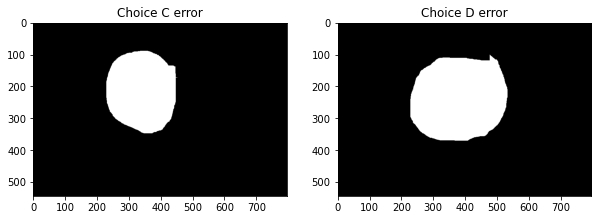

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
c_dilation = cv2.dilate(c_opening, kernel, iterations=10)
d_dilation = cv2.dilate(d_opening, kernel, iterations=10)
plt.subplot(1, 2, 1), plt.imshow(c_clean_image, cmap='gray'), plt.title("Choice C error")
plt.subplot(1, 2, 2), plt.imshow(d_clean_image, cmap='gray'), plt.title("Choice D error")